# Stochastic Processes: <br>Data Analysis and Computer Simulation
<br>


# Stochastic processes in the real world
<br>


# 1. Time variations and distributions of real world processes
<br>

# 1.1. Test score distribution

## TOEIC Listening & Reading Test
- TOEIC (Test of English for International Communication) is the most popular test for English communication skills in Japan. Below we show the official data from the most recent test. <pre>

|Test date|Jan. 2017|
|------|------|
|Number of examinees|134,269|
|Maximum Score|990|
|Minimum Score|5|
|Mean Score|574.3|
|Standard Deviation|175.4|
</pre>

<pre>
|score interval|count||score interval|count||score interval|count|
|-------|------|------|------|------|------|------|------|
|895-990|4,697||595-644|12,934||295-344|6,675|
|845-894|5,215||545-594|13,371||245-294|3,951|
|795-844|7,151||495-544|13,742||195-244|1,899|
|745-794|8,790||445-494|12,802||145-194|376|
|695-744|10,056||395-444|11,444||95-144|30|
|645-694|11,762||345-394|9,340||45-94|18|
|||||||0-44|16|
</pre>

In [1]:
%matplotlib inline
import numpy as np  # import numpy library as np
import math         # use mathematical functions defined by the C standard
import matplotlib.pyplot as plt # import pyplot library as plt 
plt.style.use('ggplot') # use "ggplot" style for graphs
pltparams = {'legend.fontsize': 16, 'axes.labelsize': 20, 'axes.titlesize': 20,
             'xtick.labelsize': 12, 'ytick.labelsize':12, 'figure.figsize': (7.5, 7.5),}
plt.rcParams.update(pltparams)

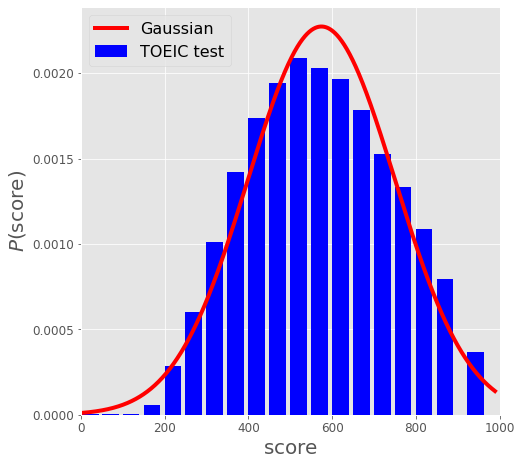

In [2]:
data=np.array([[895,990,4697],[845,894,5215],[795,844,7151],
               [745,794,8790],[695,744,10056],[645,694,11762],[595,644,12934],
               [545,594,13371],[495,544,13742],[445,494,12802],[395,444,11444],
               [345,394,9340],[295,344,6675],[245,294,3951],[195,244,1899],
               [145,194,376],[95,144,30],[45,94,18],[0,44,16],])
tot = 134269 # set total number of examinees
ave = 574.3  # set average
std = 175.4  # set standard deviation
x = np.arange(0,990,1) # create array of x from 0 to 1 with increment 0.01
y = np.exp(-(x-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2) # create array of y as y=1
fig, ax = plt.subplots(subplot_kw={'xlabel':r'$\mathrm{score}$', 'ylabel':r'$P(\mathrm{score})$'})
ax.bar((data[:,0]+data[:,1])/2,data[:,2]/tot/(data[:,1]-data[:,0]),width=40,align='center',label=r'TOEIC test',color='b')
ax.plot(x,y,linewidth=4,color='r',label=r'Gaussian') # plot y vs. x with red line
ax.set_xlim(0,1000)    # set x-range
ax.legend(loc=2)       # set legends
plt.show()             # display plots

# 1.2. Size distribution of earthquake magnitudes
## Gutenberg–Richter law

- B. Gutenberg and C.F. Richter, Annali di Geofisica, 9, 1–15 (1956).
- Eq.(J1) expresses the relationship between the magnitude $M$ and the total number of earthquakes, in any given region and time period, of magnitude greater than or equal to $M$.

$$
N=10^{(a-bM)}\tag{J1}
$$

- $N$ is the number of events having a magnitude $\ge M$
- $a$ is a normalization constant
- $b$ is a parameter referred to as the "b-value" which is usually close to 1, with some regional variations depending on the local subsurface structures.

### Japan
- F. Hirose and K. Maeda, Earth Planets Space, 63, 239–260 (2011).

![](fig/Japan.png) 

###  California
- K. Hutton, J. Woessner, and E. Hauksson, Bull. Seismological Soc. America, 100, 423–446 (2010)
![](fig/California.png) 

# 1.3. Return distribution of stock prices

## Logarithmic change in price
- Consider the time series data for some stock price or market index $P(t)$. 

- The relevant quantity is not the abolute value of the stock at any given time, but the return: the change in price after some time $\tau$. 

- For convenience one usually considers the logarithmic change $G_{\tau}(t)$, defined as

$$
  G_\tau(t) \equiv \log{P(t+\tau)} - \log{P(t)} \tag{J2}
$$

- For small relative changes $\Delta_\tau P= P(t+\tau) - P(t) \ll P(t)$, this is equivalent to the relative change in price
$$
    G_\tau(t) = \ln{\left[\frac{P(t+\tau)}{P(t)}\right]} = \ln{\left[\frac{P(t) + \Delta_\tau P(t)}{P(t)}\right]} = \ln{\left[1 + \frac{\Delta_\tau P(t)}{P(t)}\right]}
$$
using the Taylor expansion $\ln{\left( 1 + x\right)} = x - \frac{x^2}{2} + \cdots(\mathrm{for}\, \lvert x\rvert < 1)$, we have
$$
    G_\tau(t) \simeq \frac{\Delta_\tau P(t)}{P(t)} = \frac{P(t+\tau) - P(t)}{P(t)}, \qquad
$$

In [3]:
## You may install pandas-datareader by typing the following command in command prompt
## conda install pandas-datareader
import pandas as pd # import pandas library as pd
from datetime import datetime

In [4]:
# Logarithmic return of price time series
def logreturn(Pt,tau=1):
    return np.log(Pt[tau:]) - np.log(Pt[0:-tau]) # Eq.(J2) : G_tau(t) = log(S(t+tau)) - log(S(t)) 
# normalize data to have unit variance (<(x - <x>)^2> = 1)
def normalized(data):
    return (data/np.sqrt(np.var(data)))
# compute normalized probability distribution function
def pdf(data,bins=50):
    hist, edges = np.histogram(data[~np.isnan(data)], bins=bins, density=True) # remove NaNs and compute histogram (returns bar heights and bar edges)
    edges   = (edges[:-1] + edges[1:])/2.0 # get bar centers
    nonzero = hist > 0.0                   # only keep non-zero points 
    return edges[nonzero], hist[nonzero]

In [5]:
## define time interval
#end_time   = datetime.now()
#start_time = datetime(end_time.year - 30, end_time.month, end_time.day)
## get pandas data for Japanese and American stocks
#toyota     = pdr.DataReader('7203','yahoo',start_time,end_time) 
#mitsui     = pdr.DataReader('8031','yahoo',start_time,end_time)
#mitsubishi = pdr.DataReader('8058','yahoo',start_time,end_time)
#apple      = pdr.DataReader('AAPL','yahoo',start_time,end_time) 
#msft       = pdr.DataReader('MSFT','yahoo',start_time,end_time)
#hpq        = pdr.DataReader('HPQ', 'yahoo',start_time,end_time)
#nikkei     = pdr.DataReader('^N225','yahoo',start_time,end_time)
#sp500      = pdr.DataReader('^GSPC','yahoo',start_time,end_time)
#toyota.tail()

In [6]:
def read_yahoo_data(fname):
    return pd.read_csv(fname, index_col=0, parse_dates=[0],na_values="null").dropna()
toyota     = read_yahoo_data('./yahoo_finance/TM.csv')
mitsui     = read_yahoo_data('./yahoo_finance/MTU.csv')
mitsubishi     = read_yahoo_data('./yahoo_finance/MITSY.csv')
apple     = read_yahoo_data('./yahoo_finance/AAPL.csv')
msft     = read_yahoo_data('./yahoo_finance/MSFT.csv')
hpq     = read_yahoo_data('./yahoo_finance/HPQ.csv')
nikkei     = read_yahoo_data('./yahoo_finance/^N225.csv')
sp500     = read_yahoo_data('./yahoo_finance/^GSPC.csv')
toyota.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-06-27,104.980003,105.029999,104.480003,104.540001,104.540001,218900.0
2017-06-28,104.989998,105.349998,104.769997,105.309998,105.309998,193300.0
2017-06-29,105.120003,105.120003,103.839996,104.339996,104.339996,182700.0
2017-07-03,105.800003,106.339996,105.650002,106.029999,106.029999,165700.0
2017-07-05,108.150002,108.779999,108.099998,108.529999,108.529999,493178.0


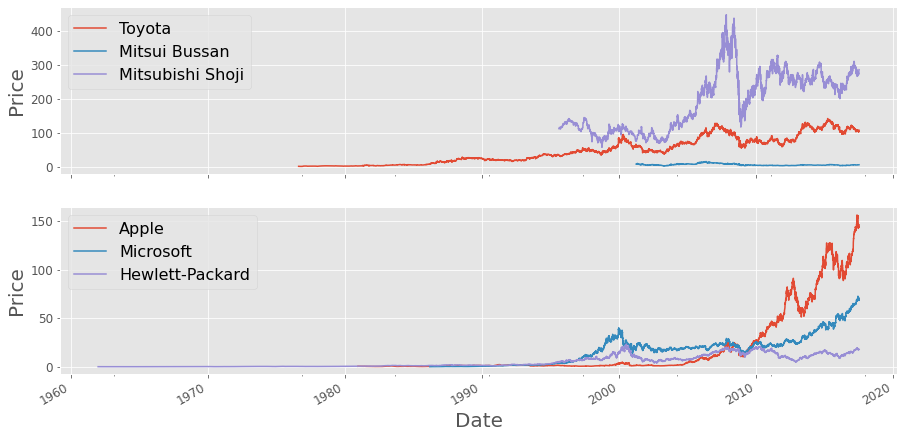

In [7]:
fig,[ax,bx]=plt.subplots(figsize=(15,7.5),nrows=2,sharex=True,subplot_kw={'xlabel':r'Date','ylabel':r'Price'})
for stock,lbl in zip([toyota,mitsui,mitsubishi],['Toyota','Mitsui Bussan','Mitsubishi Shoji']):
    stock['Adj Close'].plot(ax=ax,legend=True,label=lbl)
for stock,lbl in zip([apple,msft,hpq],['Apple','Microsoft','Hewlett-Packard']):
    stock['Adj Close'].plot(ax=bx,legend=True,label=lbl)
plt.show()

In [8]:
# add logarithmic return data to pandas DataFrame data using the 'Adjusted Close' stock price for each day
def computeReturn(data, name, tau):
    data[name]=pd.Series(normalized(logreturn(data['Adj Close'].values, tau)),index=data.index[:-tau])
for stock in [toyota,mitsui,mitsubishi,nikkei,apple,msft,hpq,sp500]:
    computeReturn(stock,'Return d1',1)
toyota.tail()

,Open,High,Low,Close,Adj Close,Volume,Return d1
Date,,,,,,,
2017-06-27,104.980003,105.029999,104.480003,104.540001,104.540001,218900.0,0.394918
2017-06-28,104.989998,105.349998,104.769997,105.309998,105.309998,193300.0,-0.497973
2017-06-29,105.120003,105.120003,103.839996,104.339996,104.339996,182700.0,0.864644
2017-07-03,105.800003,106.339996,105.650002,106.029999,106.029999,165700.0,1.254109
2017-07-05,108.150002,108.779999,108.099998,108.529999,108.529999,493178.0,NaN


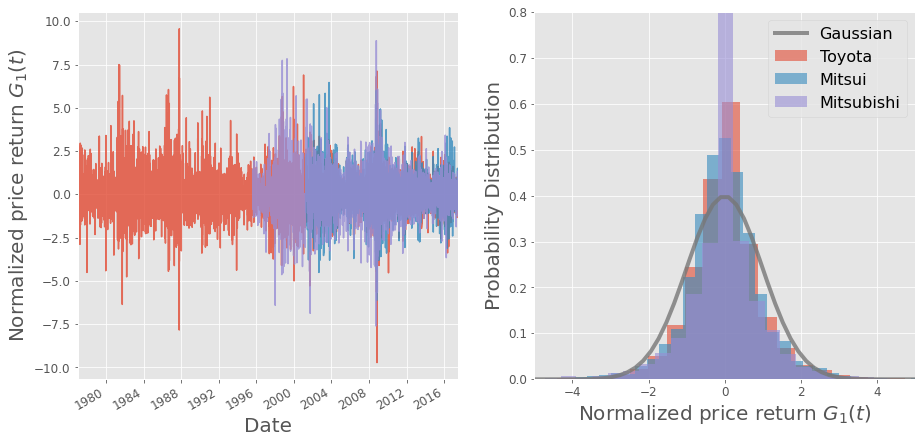

In [9]:
fig, [ax,bx] = plt.subplots(figsize=(15.0, 7.5),ncols=2)
for data,lbl in zip([toyota,mitsui,mitsubishi],['Toyota','Mitsui','Mitsubishi']):
    data['Return d1'].plot(ax=ax,alpha=0.8, x='Date')
    data['Return d1'].hist(ax=bx,alpha=0.6,density=True,bins=40,lw=0,label=lbl)
x = np.linspace(-5,5)
bx.plot(x,np.exp(-x**2/2)/np.sqrt(2*np.pi),lw=4,alpha=0.8,label='Gaussian')
bx.legend()
ax.set_ylabel('Normalized price return $G_1(t)$')
bx.set_xlabel('Normalized price return $G_1(t)$')
bx.set_ylabel('Probability Distribution')
ax.set_xlim(pd.Timestamp('1977-01-01'), pd.Timestamp('2017-07-01'))
bx.set_xlim([-5,5])
bx.set_ylim([0,0.8])
plt.show()

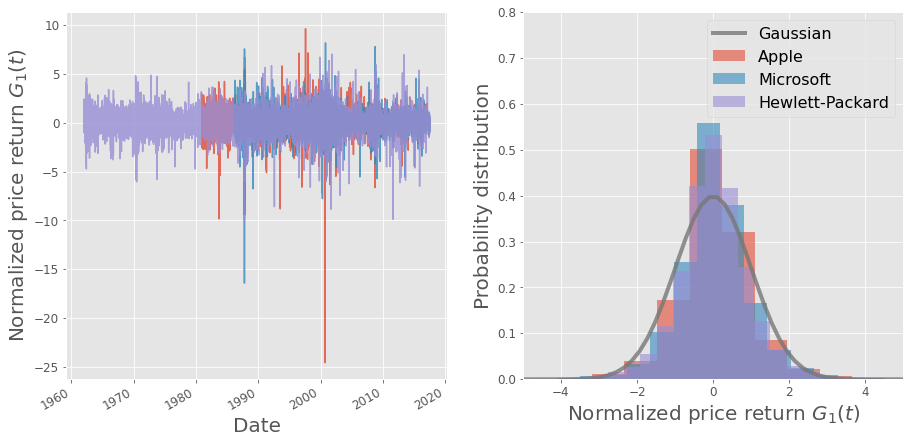

In [10]:
fig,[ax,bx]=plt.subplots(figsize=(15.0,7.5),ncols=2)
for data,lbl in zip([apple,msft,hpq],['Apple','Microsoft','Hewlett-Packard']):
    data['Return d1'].plot(ax=ax,alpha=0.8,label=lbl)
    data['Return d1'].hist(ax=bx,alpha=0.6,density=True,bins=40,lw=0,label=lbl)
x = np.linspace(-5,5)
bx.plot(x,np.exp(-x**2/2)/np.sqrt(2*np.pi),lw=4,alpha=0.8,label='Gaussian')
bx.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Normalized price return $G_1(t)$')
bx.set_xlabel('Normalized price return $G_1(t)$')
bx.set_ylabel('Probability distribution')
bx.set_xlim([-5,5])
bx.set_ylim([0,0.8])
plt.show()

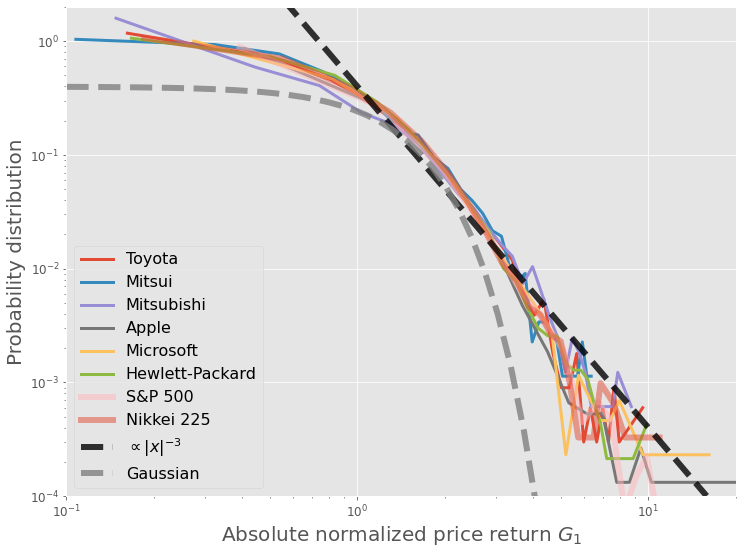

In [11]:
fig,ax=plt.subplots(subplot_kw={'xlabel':r'Absolute normalized price return $G_1$','ylabel':r'Probability distribution'}, figsize=(12,9))
# probability distribution for stocks
for stock,lbl in zip([toyota,mitsui,mitsubishi,apple,msft,hpq], 
        ['Toyota','Mitsui','Mitsubishi','Apple','Microsoft','Hewlett-Packard']):
    edges,hist=pdf(np.abs(stock['Return d1']),bins=30)
    ax.plot(edges,hist,label=lbl,lw=3)
# probability distribution for stock indices 
for stock,lbl in zip([sp500,nikkei],['S&P 500','Nikkei 225']):
    edges,hist=pdf(np.abs(stock['Return d1']),bins=30)
    ax.plot(edges,hist,label=lbl,lw=6,alpha=0.5)
# power law x^-3
x = np.logspace(-1, 1.2)
ax.plot(x,0.4*x**(-3),lw=6,ls='--',color='k',alpha=0.8,label=r'$\propto |x|^{-3}$')
ax.plot(x,np.abs(np.exp(-x**2/2)/np.sqrt(2*np.pi)),lw=6,ls='--',color='gray',alpha=0.8,label=r'Gaussian')
ax.semilogy()
ax.semilogx()
ax.set_ylim(1e-4, 2e0)
ax.set_xlim(1e-1, 2e1)
ax.legend(loc=3, fontsize=16, framealpha=0.8)
plt.show()